<a href="https://colab.research.google.com/github/IvanKatorgin/Satistics-in-Python/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B2_Python_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание по теме "Классификация и кластеризация". Каторгин И.П.

Задание 1

Попробуем определить тип популяции опоссумов по их размерам. Для работы используйте набор данных “possum.csv”, приложенный к материалам занятия.

Описание датасета:
- case: observation number (случай: номер наблюдения)
- site: The site number where the possum was trapped (место: номер места, где был пойман опоссум).
- Pop: Population, either Vic (Victoria) or other (New South Wales or Queensland) (Население: Население либо Вика (Виктория), либо другого (Новый Южный Уэльс или Квинсленд)).
- sex: Gender, either m (male) or f (female) (пол: Пол: m (мужской) или f (женский)).
- age: Age (возраст).
- hdlngth: Head length, in mm (Длина головы, в мм).
- skullw: Skull width, in mm (череп: Ширина черепа, в мм).
- totlngth: Total length, in cm (Общая длина, в см).
- taill: Tail length, in cm (длина хвоста, в см).
- footlgth: foot length (длина стопы)
- earconch: ear conch length (длина раковины)
- eye: distance from medial canthus to lateral canthus of right eye (глаз: расстояние от медиального угла угла глаза до латерального угла правого глаза)
- chest: chest girth (in cm) (грудь: обхват груди (в см))
- belly: belly girth (in cm) (живот: обхват живота (в см))

Для выполнения задания:
- Выберите и оставьте числовые признаки, по которым будете определять тип животных, и целевую переменную - Рор
- Закодируйте значения по столбцу Рор в 0 и 1 (можно использовать метод LabelEncoder)
- Разделите данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)
- Постройте модель LDA
- Рассчитайте точность вашей модели на тестовой выборке

In [ ]:
import pandas as pd, numpy as np, math, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as st
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
possum = pd.read_csv('possum.csv', encoding = "utf-8", sep = ',')
possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
possum.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


В данных имеются незначительные пропуски в столбцах age - 2 пропуска и footlgth - одby пропуск. Предлагается исключить эти строки из дальнейшего исследования

In [ ]:
possum.dropna(subset=['age', 'footlgth'], inplace=True)
possum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [ ]:
possum.reset_index(drop= True, inplace= True)

In [ ]:
possum.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


После удаления строк с пропусками проверили средние параметры выборки. Изменения средних параметров незначительные

Оставляем числовые признаки, по которым будем определять тип животных

In [ ]:
data = pd.DataFrame(possum[['hdlngth',	'skullw',	'totlngth',	'taill',	'footlgth',	'earconch',	'eye',	'chest',	'belly']])
data

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...
96,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


Кодируем значения по столбцу Рор в 0 и 1

In [ ]:
labelencoder = LabelEncoder()
possum.loc[:, 'Pop'] = labelencoder.fit_transform(possum.loc[:, 'Pop'])
possum['Pop'] = possum['Pop'].astype (int)
pop = possum['Pop']
pop

0      0
1      0
2      0
3      0
4      0
      ..
96     1
97     1
98     1
99     1
100    1
Name: Pop, Length: 101, dtype: int64

In [ ]:
pop.info()

<class 'pandas.core.series.Series'>
RangeIndex: 101 entries, 0 to 100
Series name: Pop
Non-Null Count  Dtype
--------------  -----
101 non-null    int64
dtypes: int64(1)
memory usage: 936.0 bytes


Разделим данные на выборку для обучения и тестирования (в соотношении 80 - тренировочная, 20 - тестовая)

In [ ]:
pop.value_counts()

Pop
1    58
0    43
Name: count, dtype: int64

In [ ]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, pop, test_size=0.20, random_state=42)

In [ ]:
len(y_test)

21

In [ ]:
y_test

84    1
55    1
66    1
67    1
45    1
39    0
22    0
44    1
10    0
0     0
18    0
30    0
97    1
33    0
77    1
4     0
93    1
78    1
12    0
31    0
76    1
Name: Pop, dtype: int64

Строим модель LDA

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Рассчитаем точность модели на тестовой выборке

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
# смотрим разницу факта и прогноза
#result = pd.DataFrame(y_test, lda.predict(X_test))
result = pd.DataFrame({'Actual': y_test, 'Predicted': lda.predict(X_test)})

In [ ]:
result

,Actual,Predicted
84,1,1
55,1,1
66,1,1
67,1,1
45,1,1
39,0,0
22,0,0
44,1,1
10,0,0
0,0,0


In [ ]:
accuracy_score(y_test, lda.predict(X_test))

1.0

In [ ]:
# коэффициенты дискриминатных линий
lda.coef_

array([[ 1.25397431,  0.57287036, -0.57703991,  3.18443802, -1.85067027,
        -3.7559553 , -0.60849765, -0.81906503, -0.22166401]])

Вывод:

Построена модель, которая позволяет определить тип популяции опоссумов по их размерам. Модель обучена, рассчитана точность модели на тестовой выборке

Задание 2

Теперь кластеризируем страны на основании показателей импорта и экспорта. Для работы используйте набор данных “Country-data.csv”, приложенный к материалам занятия.


Описание датасета:
- country: Name of the country (страна: Название страны)
- child_mort: Death of children under 5 years of age per 1000 live births (детская смертность: Смертность детей в возрасте до 5 лет на 1000 рождений)
- exports: Exports of goods and services per capita. Given as %age of the GDP per capita (экспорт: Экспорт товаров и услуг на душу населения. Выражено в % от ВВП на душу населения)
- health: Total health spending per capita. Given as %age of GDP per capita (здравоохранение: Общие расходы на здравоохранение на душу населения. Выражено в % от ВВП на душу населения)
- imports: Imports of goods and services per capita. Given as %age of the GDP per capita (импорт: Импорт товаров и услуг на душу населения. Выражено в % от ВВП на душу населения)
- income: Net income per person (доход: Чистый доход на человека)
- inflation: The measurement of the annual growth rate of the Total GDP (инфляция: измерение ежегодных темпов роста общего ВВП)
- life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same (Продолжительность жизни: Среднее количество лет, которое прожил бы новорожденный ребенок, если бы нынешняя структура смертности осталась прежней)
- total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same фертильность: Число детей, которые родились бы у каждой женщины, если бы текущий возрастной коэффициент рождаемости остался прежним).
- gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population (ВВП: ВВП на душу населения. Рассчитывается как общий ВВП, разделенный на общую численность населения).

Для выполнения задания:
- Выберите и оставьте только те признаки, по которым будете проводить кластерный анализ.
- Подберите оптимальное число кластеров для алгоритма K-means.
- Визуализируйте полученную кластеризацию.
- Проверьте правильность выбора кластеров с помощью метода локтя.
- Примените алгомеративную кластеризацию с учётом рассчитанного методом локтя оптимального количества кластеров.
- Визуализируйте результат.

Желательно, но не обязательно:
- Попробуйте провести кластеризацию с помощью других столбцов в наборе, оцените результаты.

In [ ]:
Country_data = pd.read_csv('Country-data.csv', encoding = "utf-8", sep = ',')
Country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
Country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
Country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Выбераем и оставляем только те признаки, по которым будем проводить кластерный анализ (импорт, экспорт)

In [ ]:
data_ = pd.DataFrame(Country_data[['exports',	'imports']])
data_

,exports,imports
0,10.0,44.9
1,28.0,48.6
2,38.4,31.4
3,62.3,42.9
4,45.5,58.9
...,...,...
162,46.6,52.7
163,28.5,17.6
164,72.0,80.2
165,30.0,34.4


In [ ]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_clas_',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

<ipython-input-26-a45e9b8fc1cc>:6: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap(cmap=cmap)


<ipython-input-27-c114b4a445a1>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_['exports'], data_['imports'], cmap='autumn', s=60)


Text(0.5, 1.0, 'соотношение импорта-экспорта')

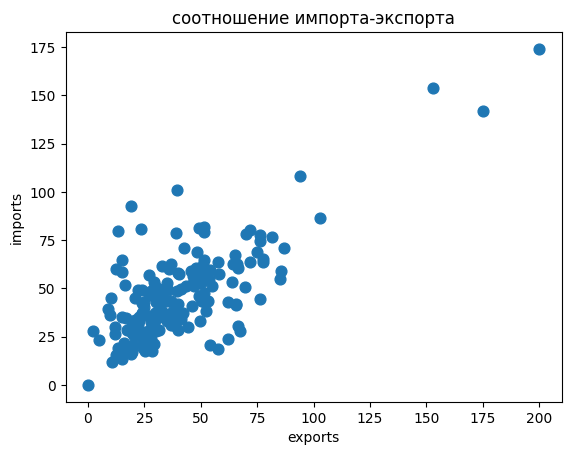

In [ ]:
plt.scatter(data_['exports'], data_['imports'], cmap='autumn', s=60)
plt.xlabel('exports')
plt.ylabel('imports')
plt.title('соотношение импорта-экспорта')

In [ ]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
v_1 = np.array(np.random.randint(0, 1000, 500))
v_2 = np.array(np.random.randint(0, 10, 500))

In [ ]:
print(v_1.max())
print(v_1.min())

print(v_2.max())
print(v_2.min())

999
6
9
0


In [ ]:
v_1_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_1_scaled
v_2_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_2_scaled

array([[ 1.19728223],
       [-0.14345935],
       [-1.14901554],
       [-0.47864475],
       [ 1.19728223],
       [ 1.53246763],
       [-1.14901554],
       [ 0.19172605],
       [ 0.86209684],
       [-0.47864475],
       [-1.14901554],
       [-1.48420093],
       [-1.48420093],
       [-0.81383014],
       [ 0.19172605],
       [-0.81383014],
       [ 0.86209684],
       [ 0.19172605],
       [-1.14901554],
       [ 1.19728223],
       [ 0.19172605],
       [-1.48420093],
       [ 1.53246763],
       [ 0.86209684],
       [ 1.19728223],
       [ 1.53246763],
       [-0.47864475],
       [-0.47864475],
       [-0.14345935],
       [ 0.52691144],
       [ 0.19172605],
       [ 1.19728223],
       [-1.48420093],
       [ 1.19728223],
       [-0.14345935],
       [ 0.52691144],
       [-1.14901554],
       [ 1.19728223],
       [ 0.19172605],
       [ 0.19172605],
       [ 0.86209684],
       [ 1.19728223],
       [-0.14345935],
       [ 0.19172605],
       [ 0.52691144],
       [-0

In [ ]:
print(v_1_scaled.max())
print(v_1_scaled.min())

print(v_2_scaled.max())
print(v_2_scaled.min())

1.6663078629469192
-1.7879910199705373
1.532467631091524
-1.4842009340492712


In [ ]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data_)
X_scaled

array([[-1.13827979e+00, -8.24549559e-02],
       [-4.79658426e-01,  7.08366942e-02],
       [-9.91216387e-02, -6.41762328e-01],
       [ 7.75381171e-01, -1.65315307e-01],
       [ 1.60667899e-01,  4.97567504e-01],
       [-8.12628115e-01, -1.27978703e+00],
       [-7.43106971e-01, -6.58828857e-02],
       [-7.79697047e-01, -1.07677917e+00],
       [ 3.72890338e-01,  3.76925537e-02],
       [ 4.82660565e-01, -1.08506521e+00],
       [-2.23527896e-01, -1.32171167e-01],
       [ 1.03882972e+00,  1.66126098e-01],
       [-9.18739335e-01, -1.03949202e+00],
       [-5.88725554e-02,  7.49797118e-02],
       [ 3.76549346e-01,  7.29576488e-01],
       [ 1.29130124e+00,  1.15216428e+00],
       [ 6.25361861e-01,  4.39565258e-01],
       [-6.33336744e-01, -4.01467309e-01],
       [ 5.08976717e-02,  9.86443578e-01],
       [ 3.33057330e-03, -5.21614819e-01],
       [-4.17455297e-01,  1.82698169e-01],
       [ 9.11467550e-02,  1.82698169e-01],
       [-1.11266674e+00, -1.45379377e+00],
       [ 9.

<ipython-input-35-2db0c5f3ae5e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)


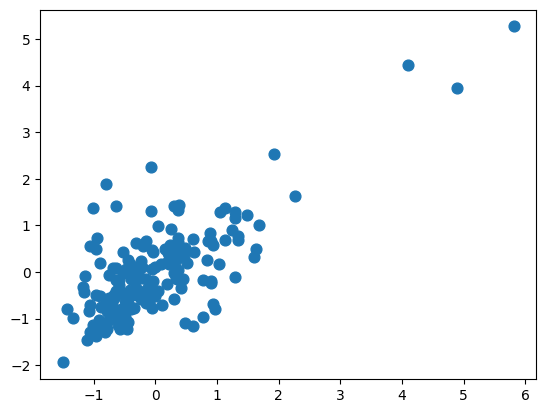

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int32)

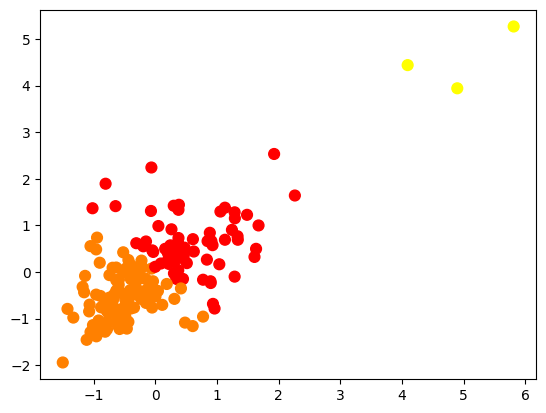

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [ ]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

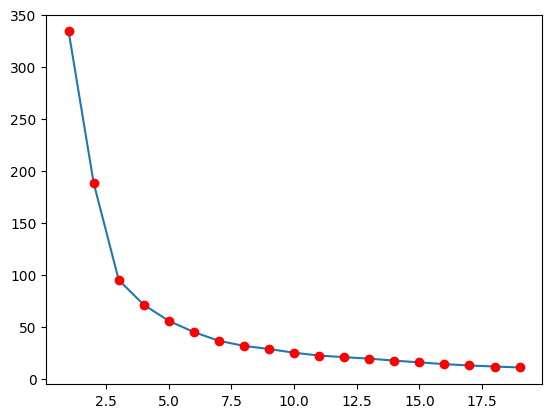

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
df_ = pd.DataFrame(data_)
df_['y_hat'] = clusters
df_

,exports,imports,y_hat
0,10.0,44.9,1
1,28.0,48.6,1
2,38.4,31.4,1
3,62.3,42.9,0
4,45.5,58.9,0
...,...,...,...
162,46.6,52.7,0
163,28.5,17.6,1
164,72.0,80.2,0
165,30.0,34.4,1


Иерархическая кластеризация

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

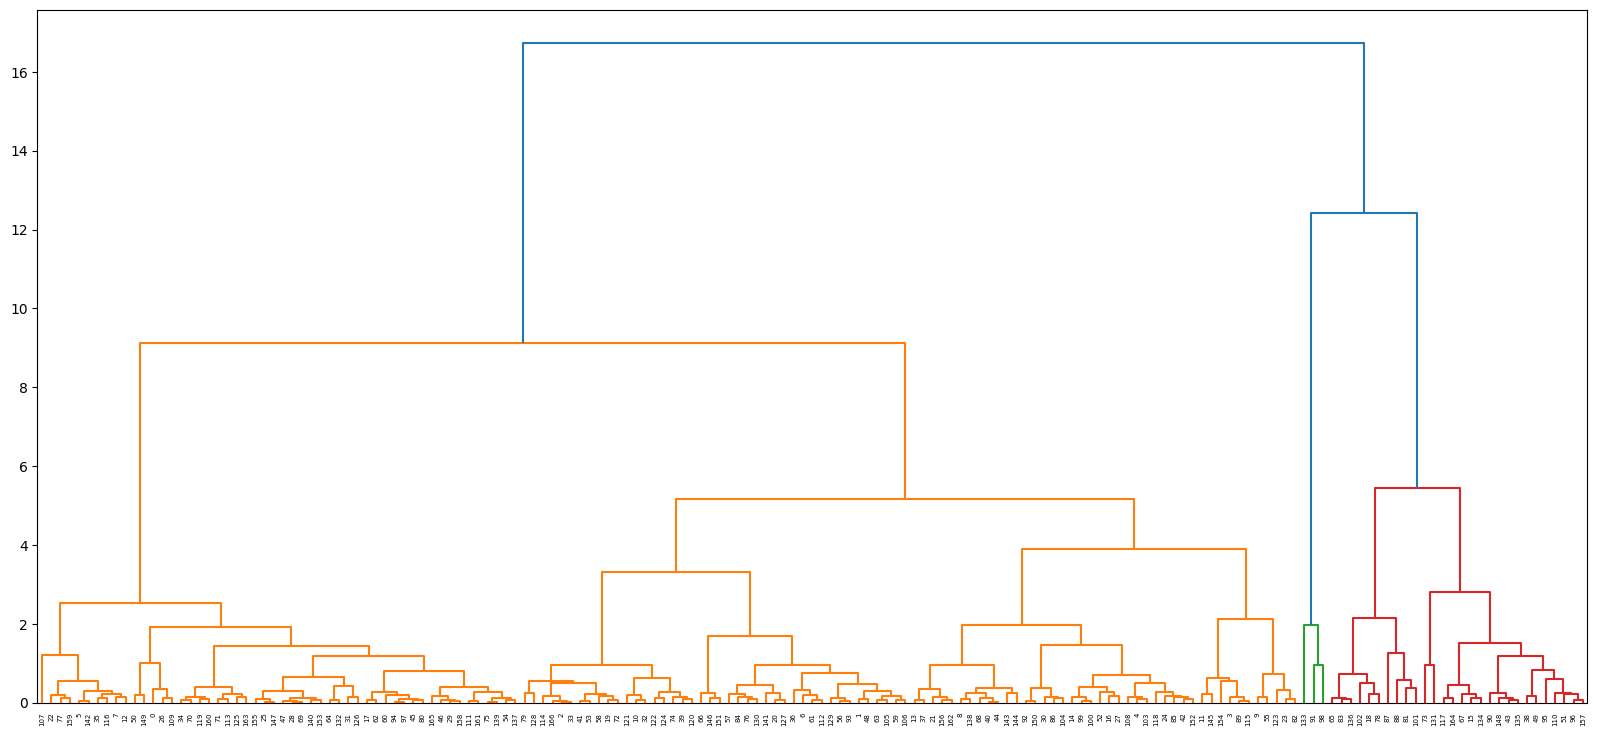

In [ ]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [ ]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [ ]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

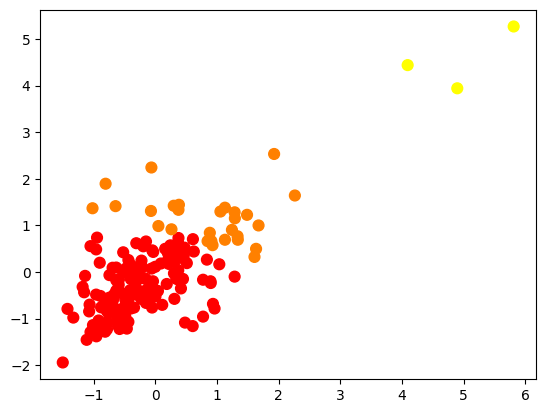

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [ ]:
df = pd.DataFrame(data_)
df['y_hat'] = clusters
df

,exports,imports,y_hat
0,10.0,44.9,0
1,28.0,48.6,0
2,38.4,31.4,0
3,62.3,42.9,0
4,45.5,58.9,0
...,...,...,...
162,46.6,52.7,0
163,28.5,17.6,0
164,72.0,80.2,1
165,30.0,34.4,0


Выводы:
- Проведена кластеризация параметров экспорта-импорта двумя способами: методом kmeans и иерархическая кластеризация
- По графику локтя выделено 3 кластера
- Была построена дендрограмма
- Полученные результаты были визуализированы
- Оба метода (kmeans и иерархическая кластеризация) показали схожие результаты

Теперь кластеризируем страны на основании показателей здравоохранения и продолжительности жизни

In [ ]:
data_1 = pd.DataFrame(Country_data[['health',	'life_expec']])
data_1

,health,life_expec
0,7.58,56.2
1,6.55,76.3
2,4.17,76.5
3,2.85,60.1
4,6.03,76.8
...,...,...
162,5.25,63.0
163,4.91,75.4
164,6.84,73.1
165,5.18,67.5


<ipython-input-49-5657931c65d0>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_1['health'], data_1['life_expec'], cmap='autumn', s=60)


Text(0.5, 1.0, 'соотношение здравоохранения и продолжительности жизни')

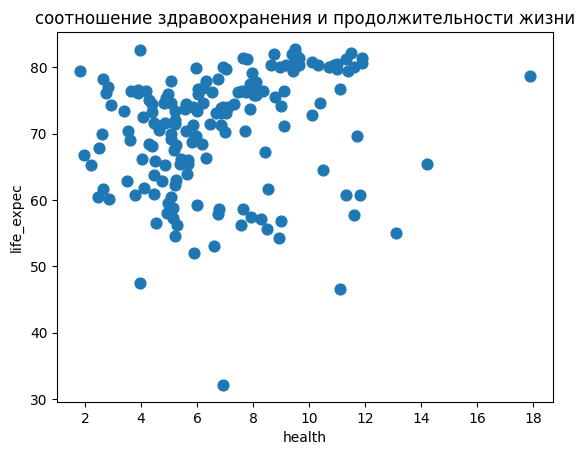

In [ ]:
plt.scatter(data_1['health'], data_1['life_expec'], cmap='autumn', s=60)
plt.xlabel('health')
plt.ylabel('life_expec')
plt.title('соотношение здравоохранения и продолжительности жизни')

In [ ]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
v_3 = np.array(np.random.randint(0, 1000, 500))
v_4 = np.array(np.random.randint(0, 10, 500))

In [ ]:
print(v_3.max())
print(v_3.min())

print(v_4.max())
print(v_4.min())

991
2
9
0


In [ ]:
v_3_scaled = scaler.fit_transform(v_1.reshape(-1, 1))
v_3_scaled
v_4_scaled = scaler.fit_transform(v_2.reshape(-1, 1))
v_4_scaled

array([[ 1.19728223],
       [-0.14345935],
       [-1.14901554],
       [-0.47864475],
       [ 1.19728223],
       [ 1.53246763],
       [-1.14901554],
       [ 0.19172605],
       [ 0.86209684],
       [-0.47864475],
       [-1.14901554],
       [-1.48420093],
       [-1.48420093],
       [-0.81383014],
       [ 0.19172605],
       [-0.81383014],
       [ 0.86209684],
       [ 0.19172605],
       [-1.14901554],
       [ 1.19728223],
       [ 0.19172605],
       [-1.48420093],
       [ 1.53246763],
       [ 0.86209684],
       [ 1.19728223],
       [ 1.53246763],
       [-0.47864475],
       [-0.47864475],
       [-0.14345935],
       [ 0.52691144],
       [ 0.19172605],
       [ 1.19728223],
       [-1.48420093],
       [ 1.19728223],
       [-0.14345935],
       [ 0.52691144],
       [-1.14901554],
       [ 1.19728223],
       [ 0.19172605],
       [ 0.19172605],
       [ 0.86209684],
       [ 1.19728223],
       [-0.14345935],
       [ 0.19172605],
       [ 0.52691144],
       [-0

In [ ]:
print(v_3_scaled.max())
print(v_3_scaled.min())

print(v_4_scaled.max())
print(v_4_scaled.min())

1.6663078629469192
-1.7879910199705373
1.532467631091524
-1.4842009340492712


In [ ]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data_1)
X_scaled

array([[ 0.27908825, -1.61909203],
       [-0.09701618,  0.64786643],
       [-0.96607302,  0.67042323],
       [-1.44807093, -1.17923442],
       [-0.28689415,  0.70425843],
       [ 0.46896621,  0.59147443],
       [-0.88208854,  0.30951442],
       [ 0.69901067,  1.29073525],
       [ 1.52790101,  1.12155924],
       [-0.34166664, -0.16417839],
       [ 0.39228473,  0.36590642],
       [-0.67395308,  0.61403123],
       [-1.20342048, -0.01755919],
       [ 0.42149672,  0.69298003],
       [-0.44025712, -0.01755919],
       [ 1.41835604,  1.06516724],
       [-0.58996859,  0.09522482],
       [-0.99163352, -0.98750161],
       [-0.58996859,  0.17417362],
       [-0.72142257,  0.11778162],
       [ 1.56441601,  0.70425843],
       [ 0.5419962 , -1.51758642],
       [ 0.80125265,  0.41102002],
       [-1.45172243,  0.73809363],
       [ 0.0198318 ,  0.37718482],
       [-0.0276377 , -1.42735922],
       [ 1.74699097, -1.44991602],
       [-0.41469662, -0.5025304 ],
       [-0.61552909,

<ipython-input-57-2db0c5f3ae5e>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)


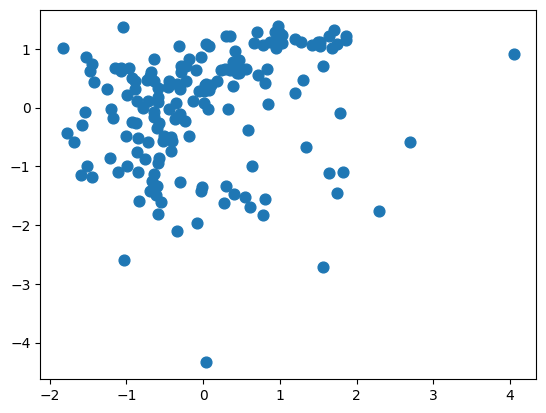

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2,
       0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2,
       2, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0,
       1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2], dtype=int32)

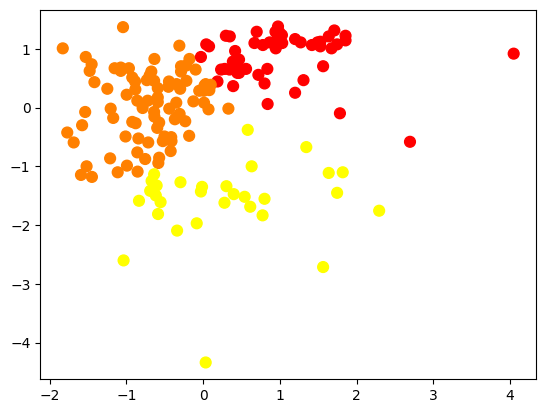

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [ ]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

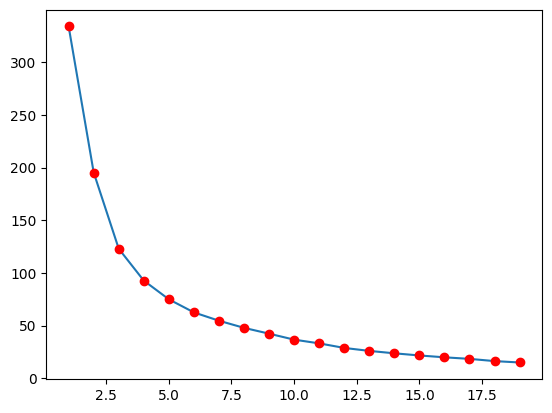

In [ ]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
df_1 = pd.DataFrame(data_1)
df_1['y_hat'] = clusters
df_1

,health,life_expec,y_hat
0,7.58,56.2,2
1,6.55,76.3,1
2,4.17,76.5,1
3,2.85,60.1,1
4,6.03,76.8,1
...,...,...,...
162,5.25,63.0,1
163,4.91,75.4,1
164,6.84,73.1,1
165,5.18,67.5,1


Иерархическая кластеризация

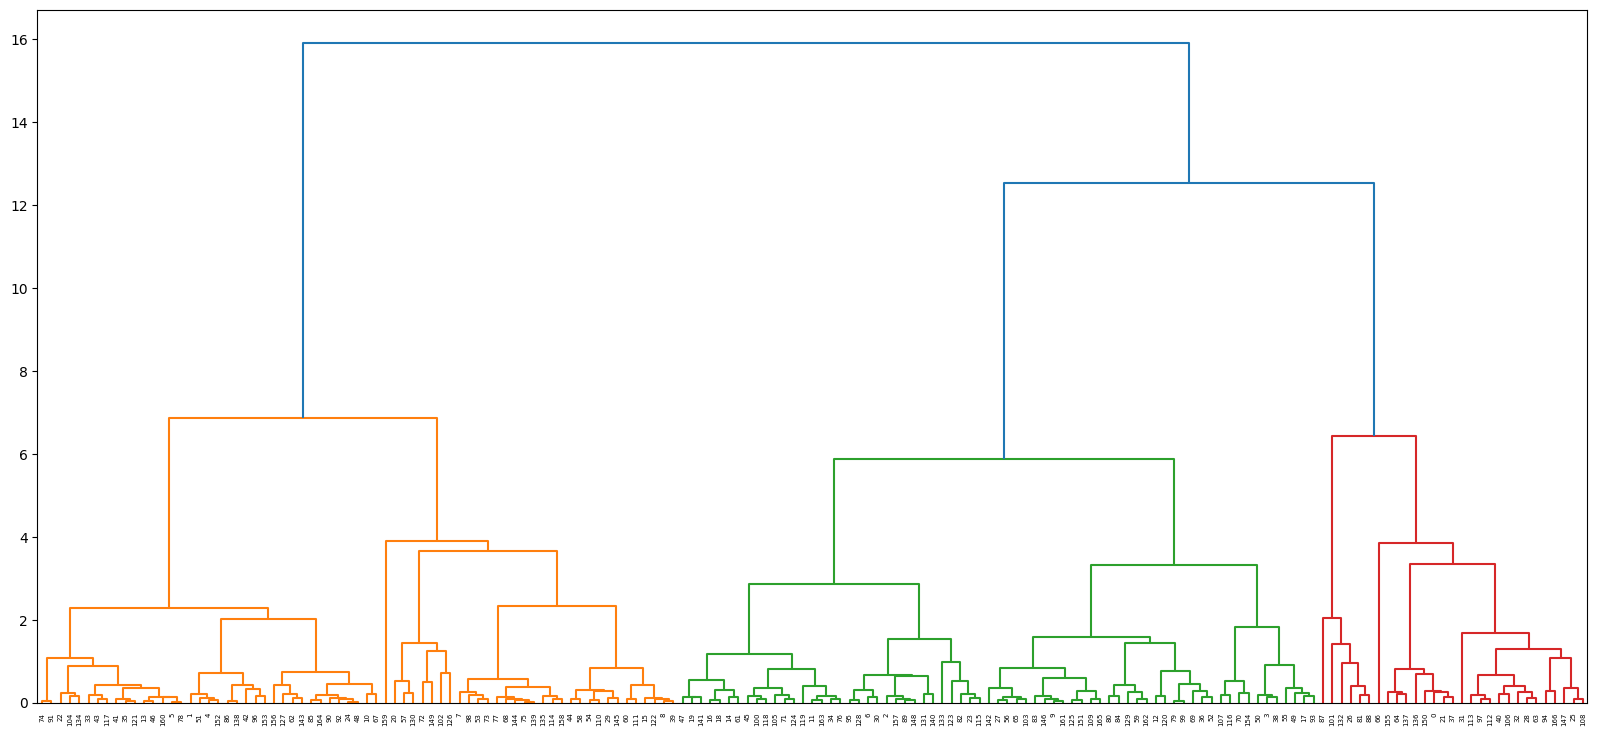

In [ ]:
# строим дендрограмму
distance_mat = pdist(X_scaled) # pdist посчитает нам матрицу попарных расстояний между точками
# Z = hierarchy.linkage(distance_mat) # linkage — реализация агломеративного алгоритма
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [ ]:
# делаем уже кластеризацию по факту
from sklearn.cluster import AgglomerativeClustering

In [ ]:
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1,
       0, 2, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1,
       1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1])

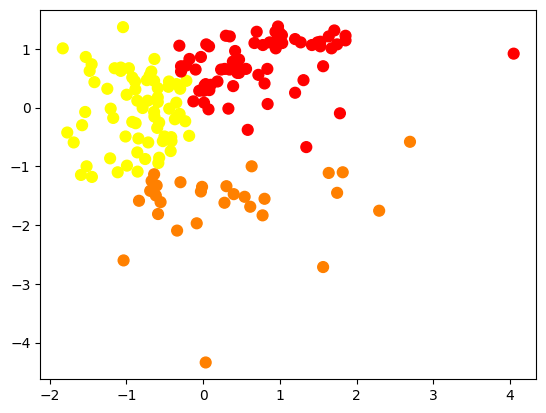

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [ ]:
df_2 = pd.DataFrame(data_1)
df_2['y_hat'] = clusters
df_2

,health,life_expec,y_hat
0,7.58,56.2,1
1,6.55,76.3,0
2,4.17,76.5,2
3,2.85,60.1,2
4,6.03,76.8,0
...,...,...,...
162,5.25,63.0,2
163,4.91,75.4,2
164,6.84,73.1,0
165,5.18,67.5,2


Выводы:
- Проведена кластеризация параметров экспорта-импорта двумя способами: методом kmeans и иерархическая кластеризация
- По графику локтя выделено 3 кластера
- Была построена дендрограмма
- Полученные результаты были визуализированы
- Оба метода (kmeans и иерархическая кластеризация) показали схожие результаты